In [ ]:
# Importing necessary libraries
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords


# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
sms = pd.read_csv('/content/spam.csv', encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = sms

In [ ]:
styled_df = df.head()
styled_df = styled_df.style.set_table_styles([])  # Setting an empty list removes all table styles

# Display the colorless DataFrame
styled_df


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",nan,nan,nan
1,ham,Ok lar... Joking wif u oni...,nan,nan,nan
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,nan,nan,nan
3,ham,U dun say so early hor... U c already then say...,nan,nan,nan
4,ham,"Nah I don't think he goes to usf, he lives around here though",nan,nan,nan


**DATA CLEANING**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

In [ ]:
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.isnull().sum()

target           0
text             0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df = df.drop_duplicates(keep = 'first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 5)

In [ ]:
values = df['target'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 87.3669955503966
percentage of 1 : 12.633004449603405


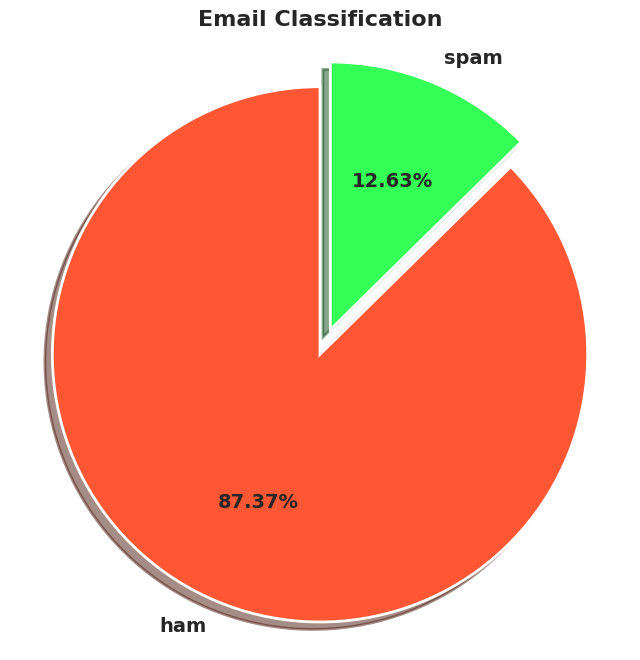

In [ ]:
import matplotlib.pyplot as plt

# Sample data
values = [87.37, 12.63]  # Updated percentages for 'ham' and 'spam'

# Define custom colors
colors = ['#FF5733', '#33FF57']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()


In [ ]:
import pandas as pd
import nltk

# Assuming df is your DataFrame

# Create a deep copy of the subset
df = df.copy()

# Calculate the number of characters
df['num_characters'] = df['text'].apply(len)

# Calculate the number of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

# Calculate the number of sentences
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [ ]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


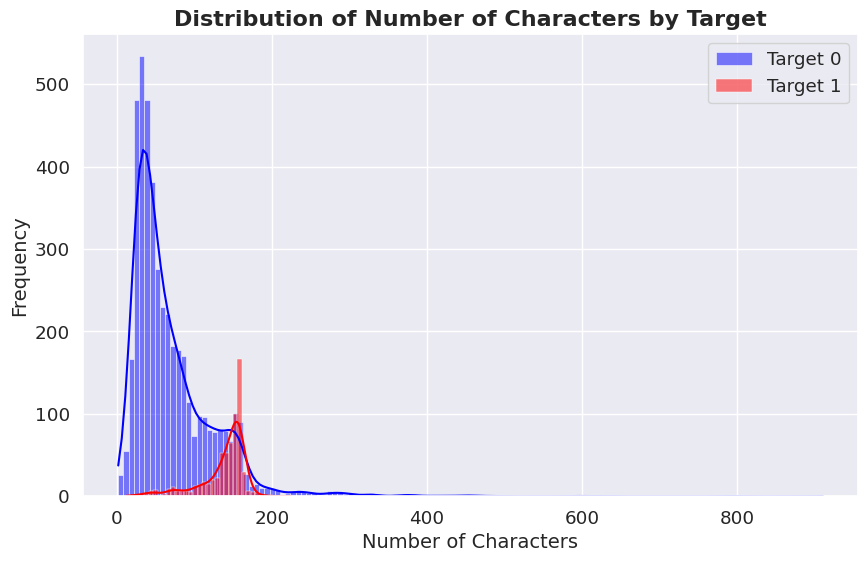

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()


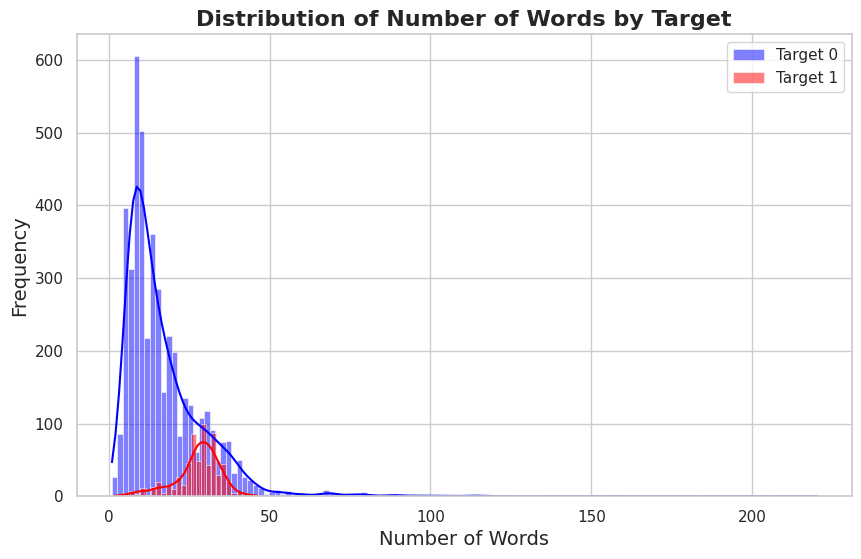

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()


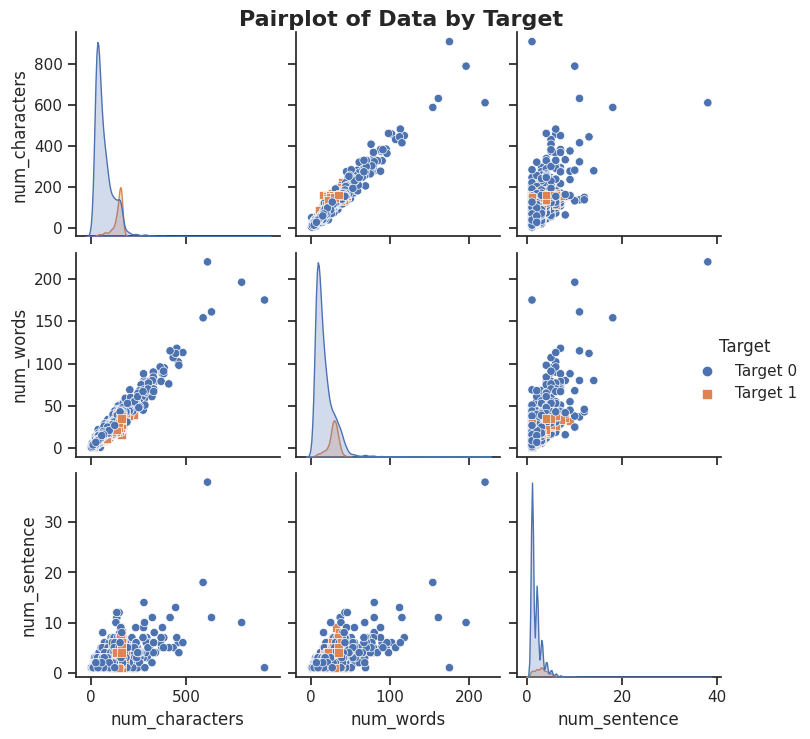

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot with custom styling
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df, hue='target', diag_kind='kde', markers=["o", "s"])

# Set a title for the pairplot
g.fig.suptitle("Pairplot of Data by Target", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)  # Adjust the position of the title

# Customize the legend
g._legend.set_title('Target')
for t, l in zip(g._legend.texts, ["Target 0", "Target 1"]):
    t.set_text(l)

# Show the pairplot
plt.show()


In [ ]:
df[['target','num_characters', 'num_words', 'num_sentence']].corr()

,target,num_characters,num_words,num_sentence
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentence,0.263939,0.624139,0.679971,1.000000


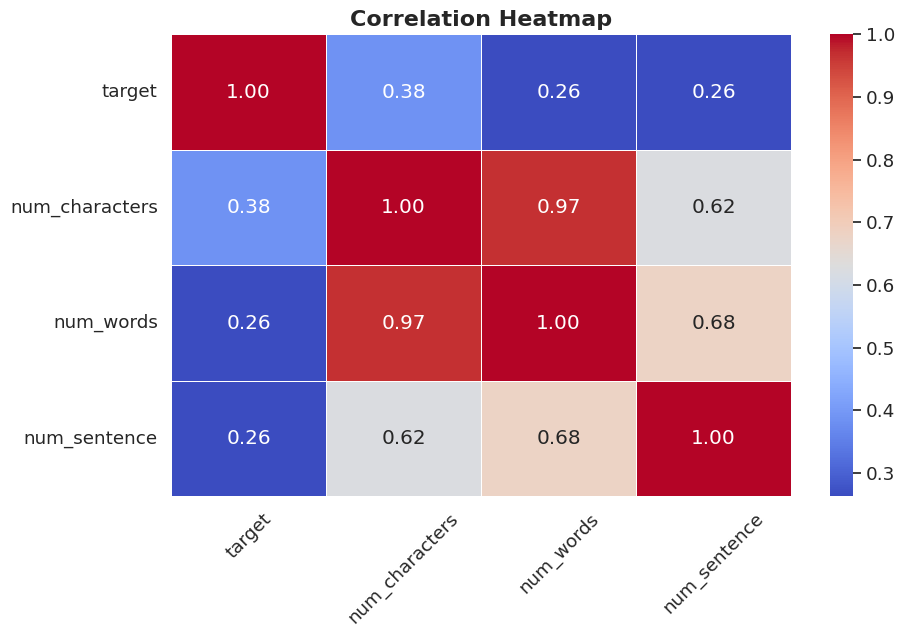

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the correlation matrix
correlation_matrix = df[['target', 'num_characters', 'num_words', 'num_sentence']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set a title for the heatmap
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.show()

In [ ]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()

    # Tokenization using NLTK
    text = nltk.word_tokenize(text)

    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # Removing stop words and punctuation
    text = y[:]
    y.clear()

    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    # Join the processed tokens back into a single string
    return " ".join(y)


In [ ]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
styled_df = df.head(5).style


# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "white"), ('font-weight', 'bold')]}
])

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",nan,nan,nan,111,24,2,go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,0,Ok lar... Joking wif u oni...,nan,nan,nan,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,nan,nan,nan,155,37,2,free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
3,0,U dun say so early hor... U c already then say...,nan,nan,nan,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives around here though",nan,nan,nan,61,15,1,nah think goe usf live around though


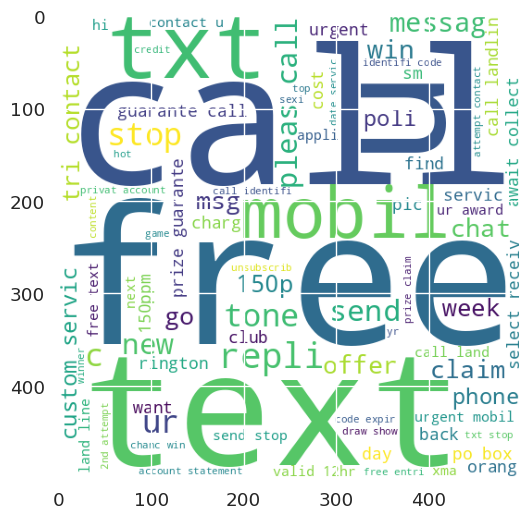

In [ ]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

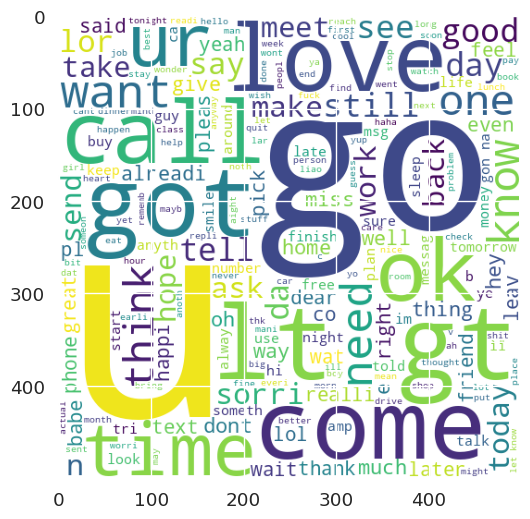

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

In [ ]:
spam_carpos = []
for sentence in df[df['target'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

In [ ]:
from collections import Counter
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

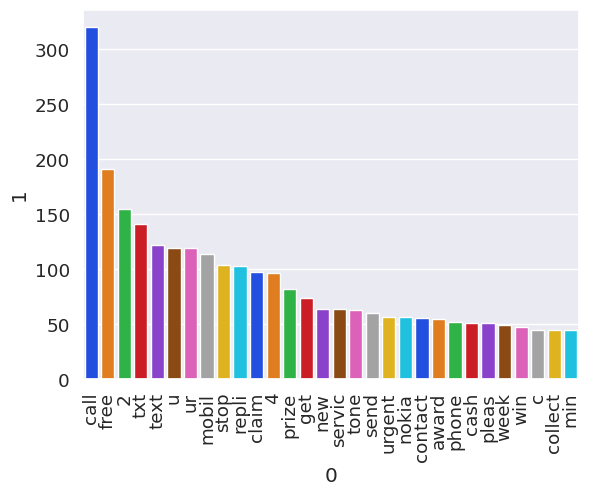

In [ ]:
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
ham_carpos = []
for sentence in df[df['target'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

In [ ]:
filter_ham_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

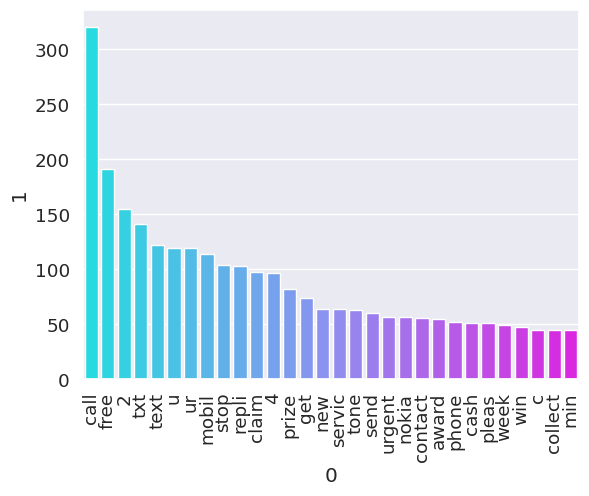

In [ ]:
sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

In [ ]:
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)

In [ ]:
clfs = {
    'SVC': svc,}

In [ ]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy , precision

In [ ]:
accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision = train_classifier(clfs, X_train, y_train, X_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For:  SVC
Accuracy:  0.9758220502901354
Precision:  0.9747899159663865
